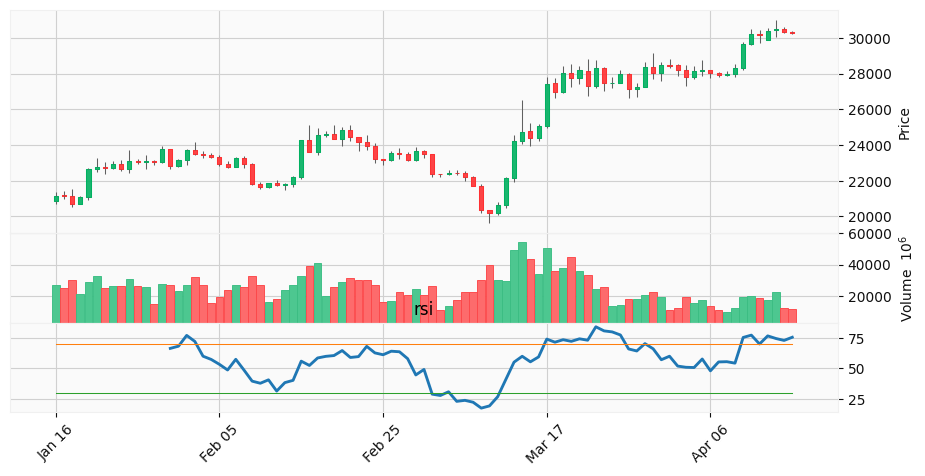

In [3]:
import pandas as pd
import numpy as np
import mplfinance as mpf
df = pd.read_csv("./BTC-USD.csv", index_col='Date', parse_dates=True)
# manual implementration
def calc_rsi(prices,dates):
    period = 14
    output = []
    
    gains = []
    loss = []
    for i in range(1, len(prices)):
        
        percent_change = (prices[i] / prices[i-1])*100-100 # calc gain or loss in percent
        if percent_change > 0:
            gains.append(percent_change)
            loss.append(0)
        elif percent_change < 0:
            loss.append(abs(percent_change))
            gains.append(0)
        else:
            loss.append(0)
            gains.append(0)
            
        if i>=period:
            date = dates[i]
            recent_gain = gains[i-period : i]
            recent_loss = loss[i-period : i]
            average_gain = sum(recent_gain)/ period
            average_loss = sum(recent_loss)/period
            
            rsi = 100 - (100/(1+ (average_gain/average_loss)))
            # print(average_gain, average_loss, rsi)
            output.append((date,rsi))
        else:
            date = dates[i]
            # output.append((date,0))
    
                
      
    return output
    
prices = df['close'].to_list()
dates = df.index.values
rsi = calc_rsi(prices, dates)
rsi_df = pd.DataFrame(rsi, columns=['date', 'rsi'])
rsi_df.set_index('date', inplace=True)
rsi_level = pd.Series(70, index=df.index)

df = df.join(rsi_df, how='outer')
# Create a pd.Series with the same length as the RSI data, filled with the RSI level 70
ap =  [
    mpf.make_addplot(df['rsi'], panel=2, title='rsi'),  
    mpf.make_addplot(pd.Series(70, index=df.index), panel=2,secondary_y=False, width=0.75),
    mpf.make_addplot(pd.Series(30, index=df.index), panel=2,secondary_y=False, width=0.75),
    
]

mpf.plot(df, type='candle', style='yahoo', volume=True, figratio=(8,4), addplot=ap)


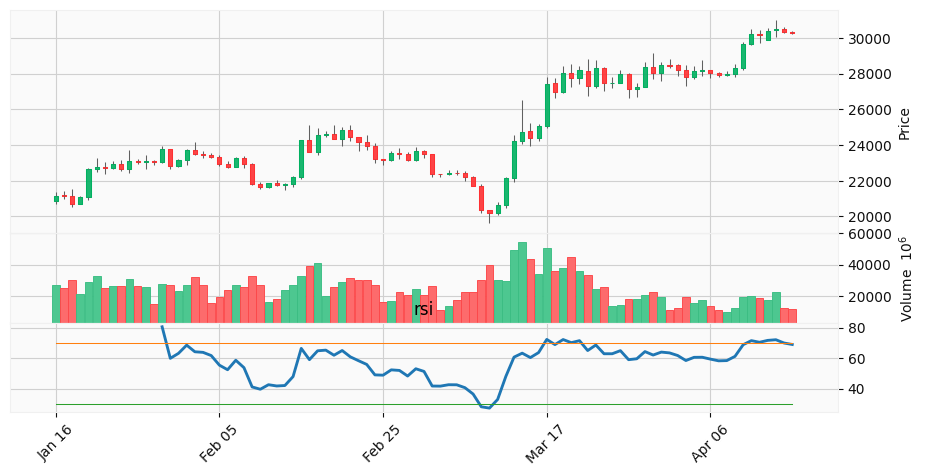

In [5]:
# Using libs, but result a bit different because of smoothing
import pandas as pd
import ta

# Read data from CSV file
df = pd.read_csv("./BTC-USD.csv", index_col='Date', parse_dates=True)

# Calculate RSI
rsi = ta.momentum.RSIIndicator(df['close'], window=14, fillna=False)
df['RSI'] = rsi.rsi()
df

ap =  [
    mpf.make_addplot(df['RSI'], panel=2, title='rsi'),  
    mpf.make_addplot(pd.Series(70, index=df.index), panel=2,secondary_y=False, width=0.75),
    mpf.make_addplot(pd.Series(30, index=df.index), panel=2,secondary_y=False, width=0.75),
    
]

mpf.plot(df, type='candle', style='yahoo', volume=True, figratio=(8,4), addplot=ap)
